# Results of the offline phase

This notebook reports some python code to generate useful results.

In this tutorial we are going to analyse the output of each offline solver, in particular the structure is the following:
- **Problem Reducibility** by checking the POD eigenvalues (or SVD singular values);
- **Analysis of the Lebesgue Constant for EIM** for the different fields;
- **Analysis of the Lebesgue Constant for GEIM** for various point spreads;
- **Comparison of the train error** for different algorithms (POD, GEIM and WeakGreedy).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

var_names = ['T', 'U']
tex_var_names = ['T', '\mathbf{u}']

## Problem Reducibility
The eigenvalues $\{\lambda_n\}$ are loaded and plotted in terms of relative importance, with respect to the total sum, i.e.
\begin{equation*}
\frac{\lambda_n}{\sum_k\lambda_k}
\end{equation*}

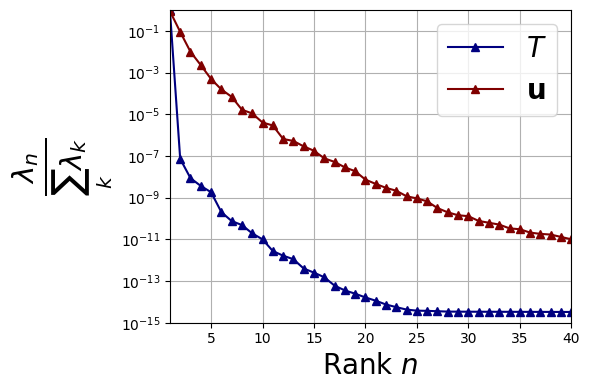

In [2]:
PODeigenvalues = dict()

PODeigFig = plt.figure( figsize= (6,4))
color = iter(cm.jet(np.linspace(0, 1, len(var_names))))

for ii, field in enumerate(var_names):
    PODeigenvalues[field] = np.loadtxt('./POD_'+field+'/'+field+'_POD_Offline_files/'+field+'EigenValues.txt')

    c = next(color)
    plt.semilogy(np.arange(1,PODeigenvalues[field].size+1,1),
                 PODeigenvalues[field]/sum(PODeigenvalues[field]), "-^", c=c, label = r"$" +tex_var_names[ii]+"$", linewidth=1.5)   

plt.xlabel(r"Rank $n$",fontsize=20)
plt.xticks(np.arange(0,40+1,5))
plt.xlim(1,40)
plt.ylim(1e-15, 1.01)
plt.ylabel(r"$\frac{\lambda_n}{\sum_k\lambda_k}$",fontsize=30)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20)

plt.tight_layout()
# PODeigFig.savefig(path+'/POD_eigenvalues.pdf', format='pdf', dpi=300, bbox_inches='tight')

It can be observed that the decrease for the eigenvalues of the velocity is much slower, showing that it is "less reducible" with respect to the velocity. Nevertheless, we can state that each of them is reducible.

## Analysis of the Lebesgue Constant for EIM
The Lebesgue constant $\Lambda_M$ is one of the main parameters that measures how good the EIM interpolation procedure is.

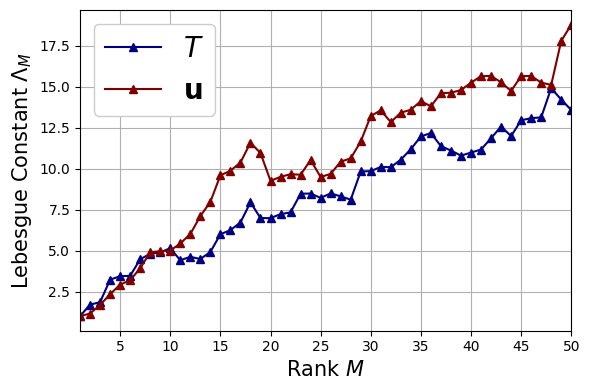

In [3]:
EIM_lebesgue = dict()

LebesgueEIM_fig = plt.figure( figsize= (6,4))
color = iter(cm.jet(np.linspace(0, 1, len(var_names))))

for ii, field in enumerate(var_names):
    EIM_lebesgue[field] = np.loadtxt('./EIM_'+field+'/'+field+'_EIM_Offline_files/Lebesgue_constant.txt')

    c = next(color)
    plt.plot(np.arange(1,EIM_lebesgue[field].size+1,1),
                 EIM_lebesgue[field], "-^", c=c, label = r"$" +tex_var_names[ii]+"$", linewidth=1.5)   

plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,50+1,5))
plt.xlim(1,50)
plt.ylabel(r"Lebesgue Constant $\Lambda_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1.)

plt.tight_layout()
# LebesgueEIM_fig.savefig(path+'/EIM_lebesgue.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Analysis of the Lebesgue Constant for GEIM
The Lebesgue constant $\Lambda_M$ is one of the main parameters that measures how good the GEIM interpolation procedure is: in particular, we are going to compare the results of EIM with GEIM at various point spread $s^2$ for the magic sensors.

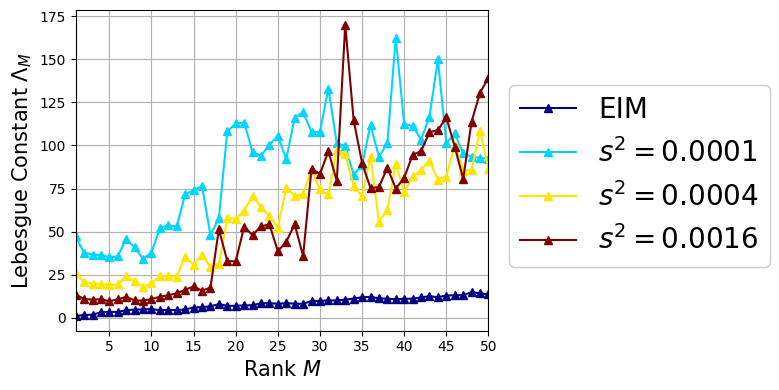

In [4]:
GEIM_lebesgue = dict()

LebesgueGEIM_fig = plt.figure( figsize= (8,4))

field = 'T'
s2 = [0.0001, 0.0004, 0.0016]
color = iter(cm.jet(np.linspace(0, 1, len(s2)+1)))
c = next(color)
plt.plot(np.arange(1,EIM_lebesgue[field].size+1,1),
                EIM_lebesgue[field], "-^", c=c, label = r"EIM", linewidth=1.5)   

for jj, spread in enumerate(s2):
    GEIM_lebesgue['s2 = {:.4f}'.format(spread)] = np.loadtxt('./GEIM_T_s_{:.4f}'.format(s2[jj])+'/'+field+'_GEIM_Offline_files/Lebesgue_constant.txt')

    c = next(color)
    plt.plot(np.arange(1,GEIM_lebesgue['s2 = {:.4f}'.format(spread)].size+1,1),
            GEIM_lebesgue['s2 = {:.4f}'.format(spread)], "-^", c=c, label = r"$s^2 = {:.4f}".format(s2[jj])+"$", linewidth=1.5)   

plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,50+1,5))
plt.xlim(1,50)
plt.ylabel(r"Lebesgue Constant $\Lambda_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = (1.05, 0.2))

plt.tight_layout()
# LebesgueGEIM_fig.savefig(path+'/GEIM_lebesgue.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Comparison of the train error
In this section, we are going to plot the maximum absolute and relative error between the reconstruction/interpolant and the true fields of the Train set, defined as follows for the generic field $\psi$ (either scalar or vector)
\begin{equation*}
E_M = \max\limits_{\boldsymbol{\mu}\in\Xi_{\text{train}}} \left\| \psi(\boldsymbol{\mu}) - \mathcal{I}_M[\psi(\boldsymbol{\mu})]\right\|_{L^2}\qquad \qquad
\varepsilon_M = \max\limits_{\boldsymbol{\mu}\in\Xi_{\text{train}}} \frac{\left\| \psi(\boldsymbol{\mu}) - \mathcal{I}_M[\psi(\boldsymbol{\mu})]\right\|_{L^2}}{\left\| \psi(\boldsymbol{\mu}) \right\|_{L^2}}
\end{equation*}
given $\mathcal{I}_M$ the reconstruction operator using $M$ basis functions.

The POD, GEIM ($s^2=0.0004$) and WeakGreedy are compared in terms of reconstruction absolute and relative with respect to the train set.

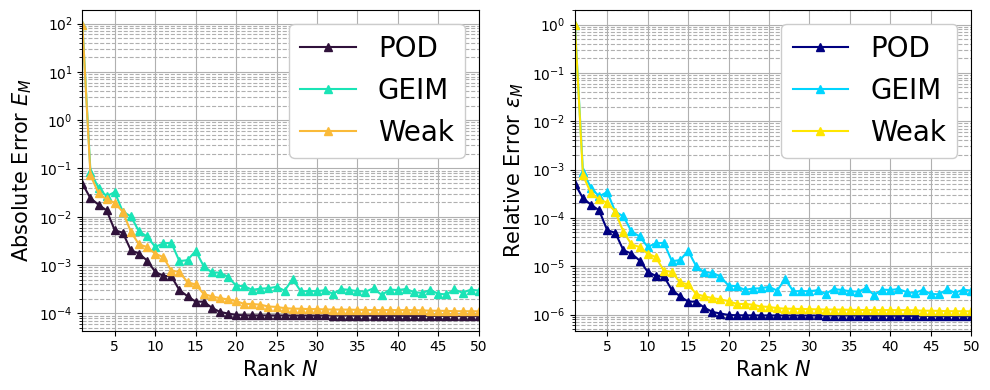

In [11]:
AbsTrainingErr = dict()
RelTrainingErr = dict()

field = 'T'
s2 = '0.0004'

# Importing data
AbsTrainingErr['POD']  = np.loadtxt('./POD_'+field+'/'+field+'_POD_Offline_files/'+field+'L2AbsError.txt')
RelTrainingErr['POD']  = np.loadtxt('./POD_'+field+'/'+field+'_POD_Offline_files/'+field+'L2RelError.txt')

AbsTrainingErr['GEIM'] = np.loadtxt('./GEIM_'+field+'_s_'+s2+'/'+field+'_GEIM_Offline_files/max_absolute_L2_error.txt')
RelTrainingErr['GEIM'] = np.loadtxt('./GEIM_'+field+'_s_'+s2+'/'+field+'_GEIM_Offline_files/max_relative_L2_error.txt')

AbsTrainingErr['Weak'] = np.loadtxt('./PBDW_'+field+'_WeakGreedy_s_'+s2+'/'+field+'_PBDW_Offline_files/max_absolute_L2_error.txt')
RelTrainingErr['Weak'] = np.loadtxt('./PBDW_'+field+'_WeakGreedy_s_'+s2+'/'+field+'_PBDW_Offline_files/max_relative_L2_error.txt')

TrainErr_fig = plt.figure( figsize= (10,4))

color = iter(cm.turbo(np.linspace(0, 1, 4)))
plt.subplot(1,2,1)
c = next(color)
plt.semilogy(np.arange(1,AbsTrainingErr['POD'].size+1,1),
         AbsTrainingErr['POD'], '-^', c=c, label=r"POD")
c = next(color)
plt.plot(np.arange(1,AbsTrainingErr['GEIM'].size+1,1),
         AbsTrainingErr['GEIM'], '-^', c=c, label=r"GEIM")
c = next(color)
plt.plot(np.arange(1,AbsTrainingErr['Weak'].size+1,1),
         AbsTrainingErr['Weak'], '-^', c=c, label=r"Weak")
         
plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,50+1,5))
plt.xlim(1,50)
plt.ylabel(r"Absolute Error $E_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = 'upper right')


color = iter(cm.jet(np.linspace(0, 1, 4)))
plt.subplot(1,2,2)
c = next(color)
plt.semilogy(np.arange(1,RelTrainingErr['POD'].size+1,1),
         RelTrainingErr['POD'], '-^', c=c, label=r"POD")
c = next(color)
plt.plot(np.arange(1,RelTrainingErr['GEIM'].size+1,1),
         RelTrainingErr['GEIM'], '-^', c=c, label=r"GEIM")
c = next(color)
plt.plot(np.arange(1,RelTrainingErr['Weak'].size+1,1),
         RelTrainingErr['Weak'], '-^', c=c, label=r"Weak")
         
plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,50+1,5))
plt.xlim(1,50)
plt.ylabel(r"Relative Error $\varepsilon_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = 'upper right')

plt.tight_layout()
# TrainErr_fig.savefig(path+'/TrainError.pdf', format='pdf', dpi=300, bbox_inches='tight')